In [1]:
with open('openapikey.txt') as fh:
    apiKey = fh.read()

In [2]:
import os
os.environ["OPENAI_API_KEY"] = (apiKey)


In [11]:
#Getting embedding from command line

!curl https://api.openai.com/v1/embeddings \
  -H f"Authorization: Bearer {apiKey}" \
  -H "Content-Type: application/json" \
  -d '{ "input": "The food was delicious and the waiter...","model": "text-embedding-ada-002","encoding_format": "float"}'


{
    "error": {
        "message": "You didn't provide an API key. You need to provide your API key in an Authorization header using Bearer auth (i.e. Authorization: Bearer YOUR_KEY), or as the password field (with blank username) if you're accessing the API from your browser and are prompted for a username and password. You can obtain an API key from https://platform.openai.com/account/api-keys.",
        "type": "invalid_request_error",
        "param": null,
        "code": null
    }
}


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100   498  100   496  100     2   1154      4 --:--:-- --:--:-- --:--:--  1158
curl: (3) URL using bad/illegal format or missing URL
curl: (3) URL using bad/illegal format or missing URL
curl: (3) URL using bad/illegal format or missing URL
curl: (3) unmatched close brace/bracket in URL position 6:
float}'
     ^


In [4]:
import numpy as np
import urllib.request
import json
import math

# Define the endpoint URL
url = 'https://api.openai.com/v1/embeddings'

# Create a function to make the API request
def get_openai_embedding(prompt):
    headers = {
        'Authorization': f'Bearer {apiKey}',
        'Content-Type': 'application/json',
    }
    data = {
        "input": prompt,    
        "model": "text-embedding-ada-002"
    }
    
    # Encode the data and make the POST request
    data = json.dumps(data).encode('utf-8')
    req = urllib.request.Request(url, data=data, headers=headers, method='POST')
    
    try:
        response = urllib.request.urlopen(req)
        response_data = json.loads(response.read().decode('utf-8'))
        return np.array(response_data['data'][0]['embedding'])
    except urllib.error.HTTPError as e:
        print(f"HTTP Error: {e}")
        return None

In [5]:
embedding = get_openai_embedding("How are you")

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [7]:
from sklearn.decomposition import PCA

def visualize_pca_2d(embeddings, words):
    pca_2d = PCA(n_components=2)
    embeddings_2d = pca_2d.fit_transform(embeddings)

    # Create a 2D scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], marker='o')
    for i, word in enumerate(words):
        plt.annotate(word, (embeddings_2d[i, 0], embeddings_2d[i, 1]))

    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.title("2D Visualization of Word Embeddings")
    plt.grid(True)
    plt.show()

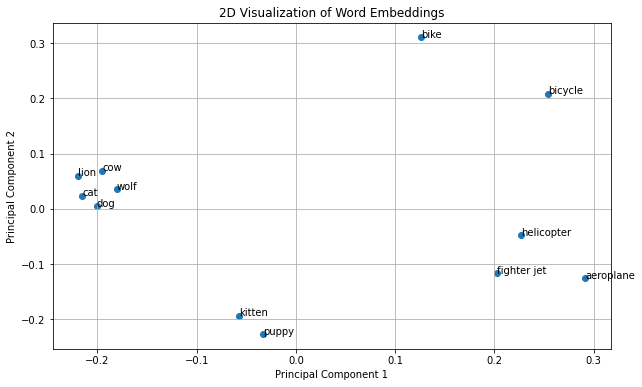

In [8]:
words = ['cat', 'dog', 'bike', 'kitten', 'puppy', 'bicycle', 'aeroplane', 'helicopter', 'cow', 'wolf', 'lion', 'fighter jet']
embeddings = []
for i in words:
    embeddings.append(get_openai_embedding(i))
visualize_pca_2d(embeddings, words)

In [15]:
# Calculate the Euclidean distance
def calculate_distance(point1, point2):
    distance_nd = sum((x - y) ** 2 for x, y in zip(point2, point1))**0.5
    return distance_nd

In [16]:
cat = get_openai_embedding('cat')
dog = get_openai_embedding('dog')
car = get_openai_embedding('car')
bike = get_openai_embedding('bike')

In [17]:
# Calculate distances between embeddings
distance_cat_dog = calculate_distance(cat, dog)
distance_cat_car = calculate_distance(cat, car)
distance_cat_bike = calculate_distance(cat, bike)
distance_bike_car = calculate_distance(bike, car)
distance_bike_dog = calculate_distance(bike, dog)

# Display distances
print(f"Distance between 'cat' and 'dog': {distance_cat_dog:.2f}")
print(f"Distance between 'cat' and 'car': {distance_cat_car:.2f}")
print(f"Distance between 'cat' and 'bike': {distance_cat_bike:.2f}")
print(f"Distance between 'bike' and 'car': {distance_bike_car:.2f}")
print(f"Distance between 'bike' and 'dog': {distance_bike_dog:.2f}")

# Compare distances
if distance_cat_dog < distance_cat_car and distance_cat_dog < distance_cat_bike:
    print("'cat' is closer to 'dog' than to 'car' or 'bike'.")

if distance_bike_car < distance_bike_dog and distance_bike_car < distance_cat_bike:
    print("'bike' is closer to 'car' than to 'dog' or 'cat'.")

Distance between 'cat' and 'dog': 0.52
Distance between 'cat' and 'car': 0.56
Distance between 'cat' and 'bike': 0.61
Distance between 'bike' and 'car': 0.54
Distance between 'bike' and 'dog': 0.58
'cat' is closer to 'dog' than to 'car' or 'bike'.
'bike' is closer to 'car' than to 'dog' or 'cat'.


In [18]:
embeddings_good_review = get_openai_embedding('The product is amazing')
embeddings_bad_review = get_openai_embedding('The product is not good')
embd_positive = get_openai_embedding('positive')
embd_neg = get_openai_embedding('negative')

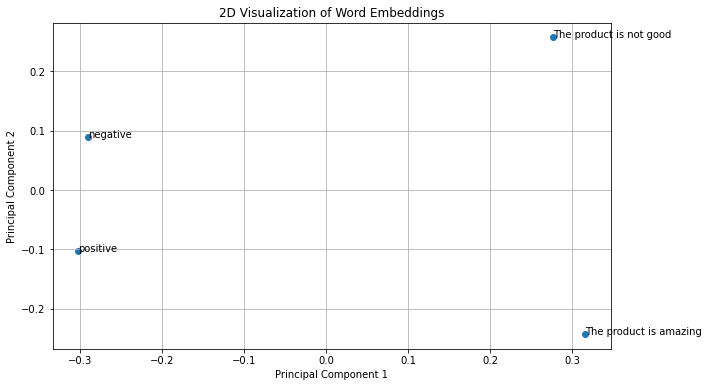

In [19]:
sent_embeddings = np.array([embeddings_good_review, embeddings_bad_review, embd_positive, embd_neg])
visualize_pca_2d(sent_embeddings, words = ['The product is amazing', 'The product is not good',
                                              'positive', 'negative'])

In [20]:
calculate_distance(embeddings_good_review, embd_positive)


0.6679850380335637

In [21]:
calculate_distance(embeddings_bad_review, embd_neg)


0.6333440247603926

In [22]:
calculate_distance(embeddings_bad_review, embd_positive), calculate_distance(embeddings_bad_review, embd_neg)

(0.6875927297300988, 0.6333440247603926)

In [23]:
def is_positive(review):
    embed_review = get_openai_embedding(review)
    dist_pos = calculate_distance(embed_review, embd_positive)
    dist_neg = calculate_distance(embed_review, embd_neg)
    if dist_pos < dist_neg:
        print("It is a positive review")
        return True
    else:
        print("It is a negative review")
        return False

In [24]:
is_positive("Camera quality is too worst. Don't buy this if you want good photos. We can get this quality pictures with 5000 rupees android phone. I am totally disappointed because I expected range of iPhone camera quality but not this.. Waste of money.")

It is a negative review


False

In [25]:
is_positive("At first it seemed like a great product but my expected were changed completed.")

It is a negative review


False

In [26]:
is_positive("At first, it seemed like a bad product but it met my expectations.")

It is a positive review


True